In [23]:
import serial
import crc8
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np




In [32]:
ser = serial.Serial()
ser.baudrate = 1700000
ser.port = "COM3"
ser.open()
ser.reset_input_buffer()

In [33]:
hash = crc8.crc8()
samples = []


bytes_read = ser.read(65532)
#bytes_read = ser.read(12)
print("bytes read: ", str(len(bytes_read)))

for idx, val in enumerate(bytes_read):
    if idx % 4 == 0:
        #print(bytes([bytes_read[idx],bytes_read[idx+1],bytes_read[idx+2],bytes_read[idx+3]]).hex())
        #if idx >= 7:
        #    print("exiting")
        #    exit()
        hash.update(b'\x56' + bytes([bytes_read[idx+1],bytes_read[idx+2],bytes_read[idx+3]]))
        if hash.digest() == bytes([bytes_read[idx]]):
            val = int.from_bytes(bytes_read[idx+1:idx+4],'little',signed=True) -158763-350
            samples.append(val)

        else: 
            print(hash.digest().hex(), bytes([bytes_read[idx]]).hex())
            print(bytes([bytes_read[idx+1],bytes_read[idx+2],bytes_read[idx+3]]).hex())
            exit()

    #if b not in [65,66,67,68]:
        #print("data error")


bytes read:  65532


In [34]:
samples_sqd = np.power(samples,2)


In [35]:
#sum_sqd = np.sum(samples_sqd)
#sum_sqd
sum=int(0)
for sample in samples_sqd:
   sum+= int(sample)
sum

2106185694

In [36]:
rms = np.sqrt(sum / len(samples_sqd))

In [37]:
20*np.log10(rms/(2**24/2))

-87.38276573246924

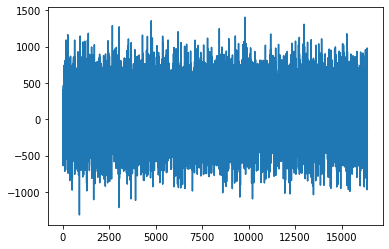

In [38]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.arange(start=0, stop=16383, step=1),samples)